# **Lab-2**

**Data Exploration and Visualization (Getting to know your data)- code and refrences**

Here you will learn to explore your data. In particular you will learn to:

* Load the data and find attribute information
* Generate a statistical summary
* Generate correlation matrix and scatter plot
* Dealing with Categorical data
* Dealing with Missing values
* Find most correlated attributes to output label

In [1]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('bike_dataset.csv')

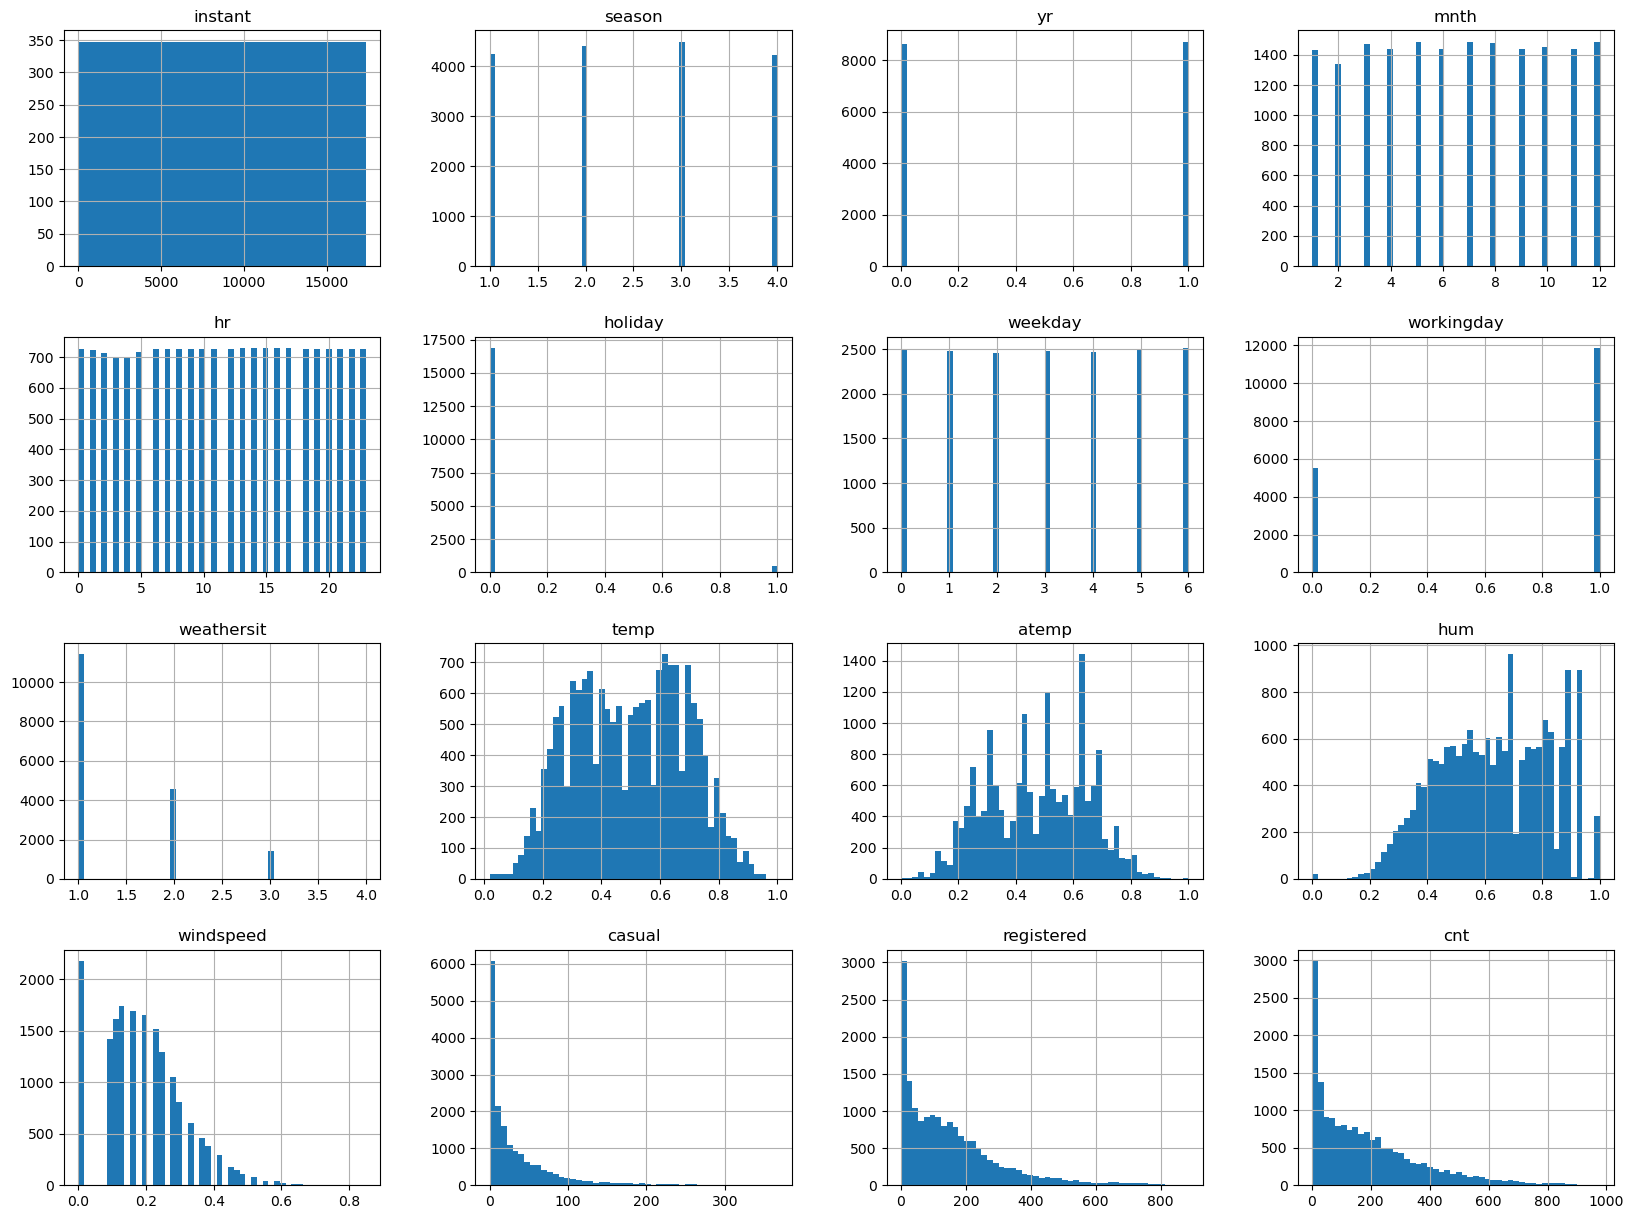

In [8]:
#To plot a histogram for each numerical attribute
df.hist(bins=50, figsize=(20,15))
plt.show()
# Q4 List down the main observations you noted from the statistical summary and the histogram

Some observations we can take away from the above data are:

* There's a consistent but not drastic difference in the amount of vistors throughout the seasons, months and hours of the day
* The count of users decreases over time with respect to the weather situation, with 4, i.e Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog, being the least desirable weather to rent a bike.
* The ideal range of windspeed in which users rent a bike is between 0 and 0.6, with the users decreasing as the * The attribute 'workingday' tells us that a majority of users rent a bike during the weekdays, rather than weekends or holidays.

## Visualizing Geographical Data


<Axes: xlabel='temp', ylabel='hum'>

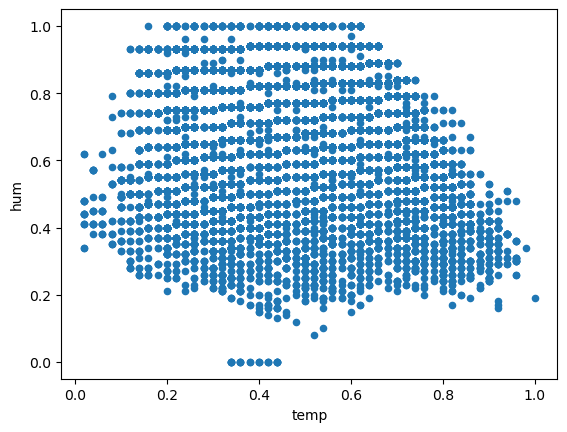

In [9]:
df.plot(kind="scatter", x="temp", y="hum")

<Axes: xlabel='temp', ylabel='hum'>

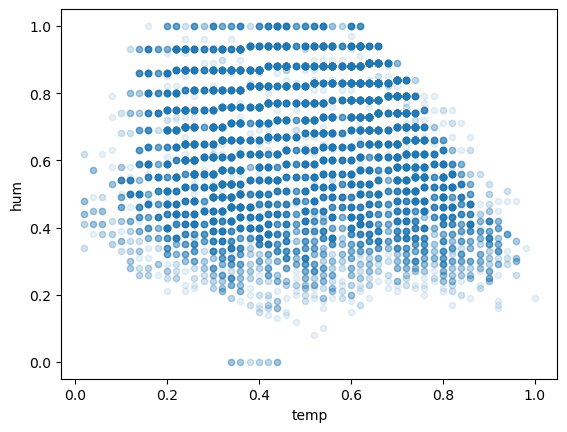

In [10]:
df.plot(kind="scatter", x="temp", y="hum", alpha = 0.1)

<Axes: xlabel='temp', ylabel='hum'>

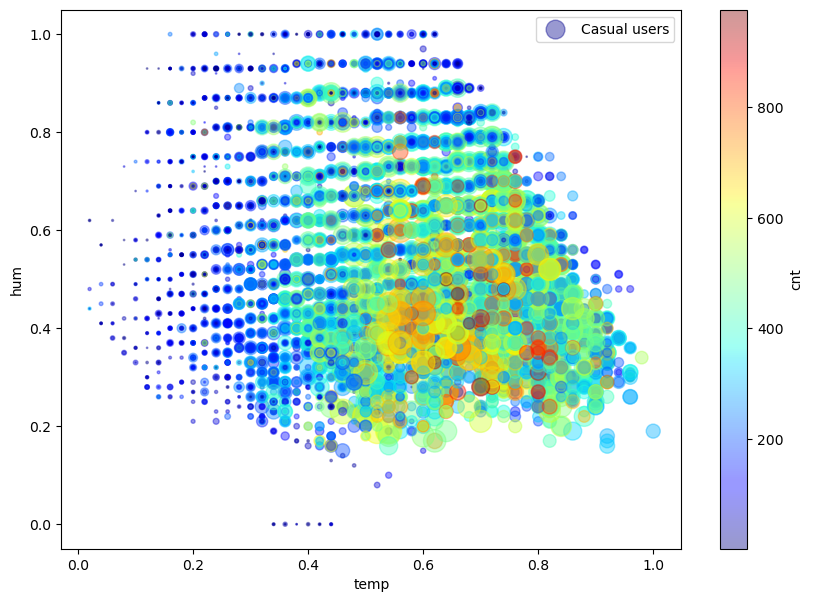

In [11]:
df.plot(kind="scatter", x="temp", y="hum", alpha=0.4,
    s=df['casual'], label="Casual users", figsize=(10,7),
    c="cnt", cmap=plt.get_cmap("jet"), colorbar=True,)

# plots Number of casual users acc to the temperature and humidity level: red is the highest value of users recorded whereas blue is the least value of users. 
# Large circles indicate temperature and humidity level with a larger amount of users.
# The radius of each circle represents the casual users(option s) and the color represents the number (option c)

<Axes: xlabel='temp', ylabel='hum'>

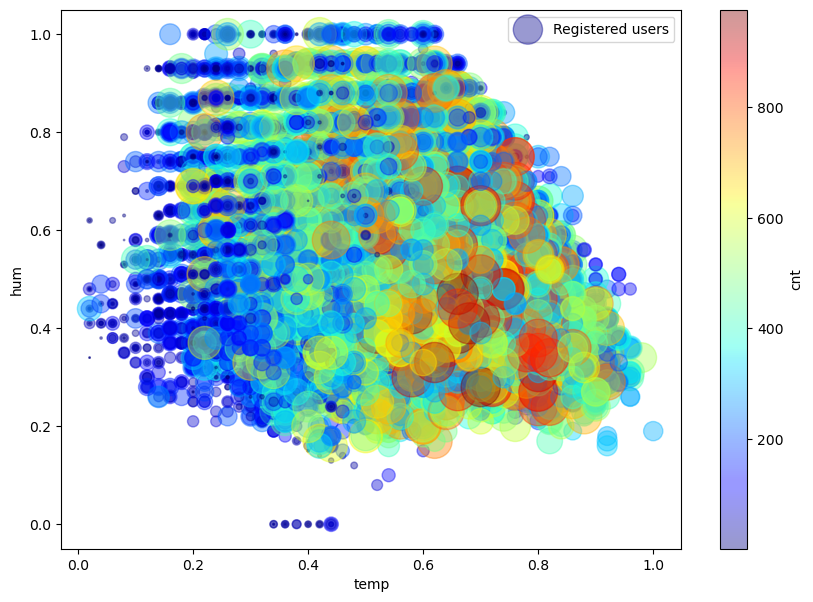

In [12]:
df.plot(kind="scatter", x="temp", y="hum", alpha=0.4,
    s=df['registered'], label="Registered users", figsize=(10,7),
    c="cnt", cmap=plt.get_cmap("jet"), colorbar=True,
)
# plots Number of registered users acc to the temperature and humidity level: red is the highest value of users recorded whereas blue is the least value of users. 
# Large circles indicate temperature and humidity level with a larger amount of users.
# The radius of each circle represents the registered users(option s) and the color represents the number (option c)

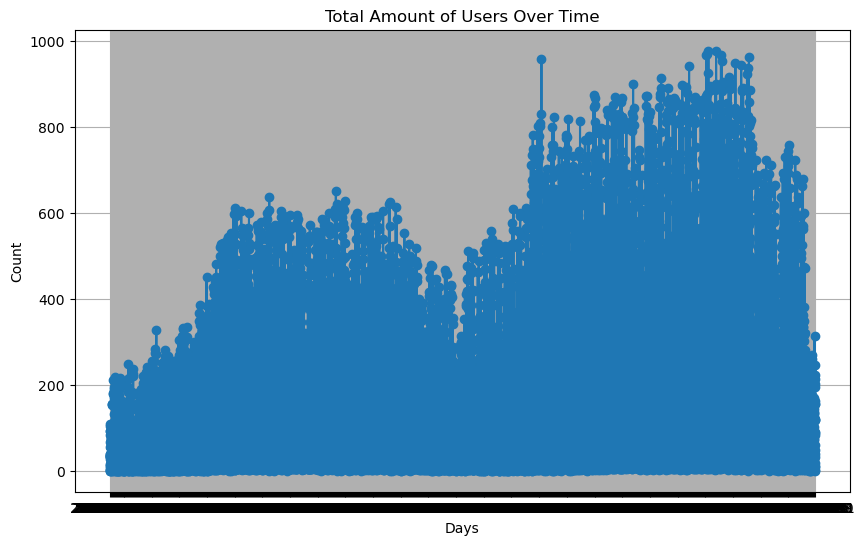

In [13]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(df['dteday'], df['cnt'], marker='o', linestyle='-')
plt.title('Total Amount of Users Over Time')
plt.xlabel('Days')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [14]:
# computes the standard correlation coefficient (Pearson’s r) between every pair of attributes
corr_matrix = df.corr(numeric_only = True)

In [15]:
# Now we will look at the correlation of all the attributes with the attribute 'cnt' to which are the correlated attributes contributing to the amount of users.
corr_matrix['cnt'].sort_values(ascending=False)

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

Apart from the features that record the amount of users, the most correlated features are temperature, apparent temperature and the hour of the day. Since cnt includes both registered and casual users, the strong positive correlation suggests that as the number of registered and casual users increases, the total count of bike rentals ("cnt") also tends to increase proportionally.

array([[<Axes: xlabel='cnt', ylabel='cnt'>,
        <Axes: xlabel='temp', ylabel='cnt'>,
        <Axes: xlabel='atemp', ylabel='cnt'>,
        <Axes: xlabel='hr', ylabel='cnt'>],
       [<Axes: xlabel='cnt', ylabel='temp'>,
        <Axes: xlabel='temp', ylabel='temp'>,
        <Axes: xlabel='atemp', ylabel='temp'>,
        <Axes: xlabel='hr', ylabel='temp'>],
       [<Axes: xlabel='cnt', ylabel='atemp'>,
        <Axes: xlabel='temp', ylabel='atemp'>,
        <Axes: xlabel='atemp', ylabel='atemp'>,
        <Axes: xlabel='hr', ylabel='atemp'>],
       [<Axes: xlabel='cnt', ylabel='hr'>,
        <Axes: xlabel='temp', ylabel='hr'>,
        <Axes: xlabel='atemp', ylabel='hr'>,
        <Axes: xlabel='hr', ylabel='hr'>]], dtype=object)

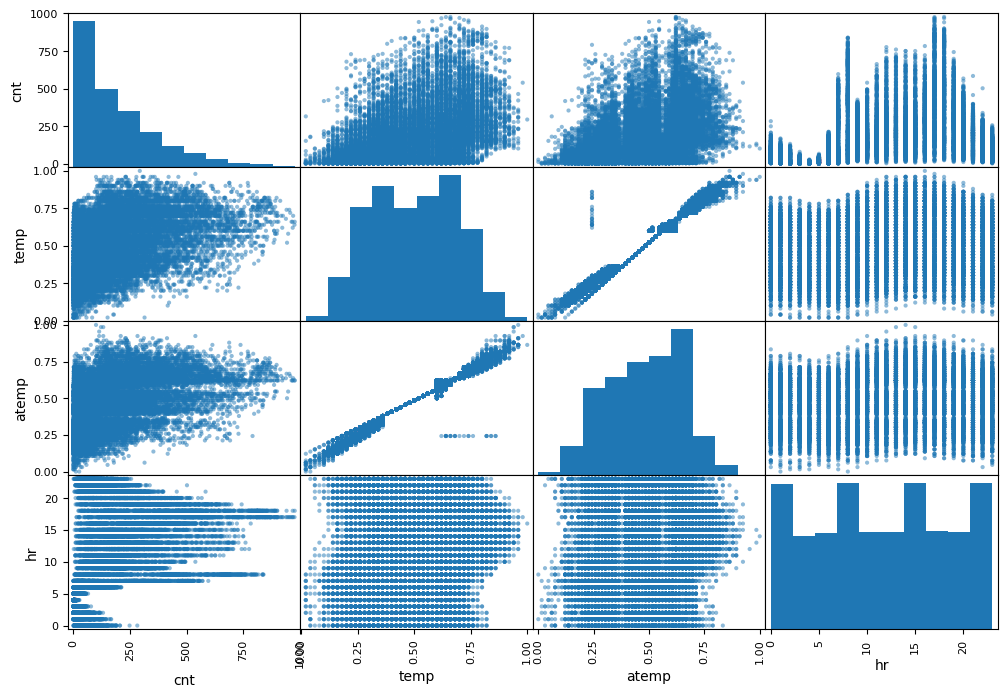

In [16]:
from pandas.plotting import scatter_matrix

attributes = ["cnt", "temp", "atemp","hr"]
scatter_matrix(df[attributes], figsize=(12, 8))
# Another way to check for correlation between attributes is to use the pandas scatter_matrix() function above
# Here we choose to plot 4 promising  numerical attributes against each other

## Experimenting with Attribute Combinations


Generating New Features


In [17]:
# Define time of day labels
time_of_day_labels = ['Night', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Midnight']

# Define the corresponding time intervals (in hours)
time_intervals = [-1, 4, 8, 12, 16, 20, 24]

# Use the cut function to create the time of day feature
df['time_of_day'] = pd.cut(df['hr'], bins=time_intervals, labels=time_of_day_labels)

In [18]:
# Calculate the ratio of casual users to registered users
df['casual_to_registered_ratio'] = df['casual'] / df['registered']

In [19]:
df['temp_windspd'] = df['temp'] * df['windspeed']

New Features Generated

1. casual_to_registered_ratio: calculated the ratio of casual users to registered users to understand the mix of user types.
2. time_of_day : created a feature to represent the time of day (morning, afternoon, evening, night) based on the "hr" column.
3. holiday_weekend : created a feature that multiplies "temp" and "windspeed" to capture the combined effect of temperature and wind.

In [20]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_of_day,casual_to_registered_ratio,temp_windspd
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,Night,0.230769,0.000000
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,Night,0.250000,0.000000
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,Night,0.185185,0.000000
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,Night,0.300000,0.000000
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,Night,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,Evening,0.101852,0.042692
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,Evening,0.098765,0.042692
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,Midnight,0.084337,0.042692
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,Midnight,0.270833,0.034918


In [21]:
corr_matrix = df.corr(numeric_only = True)

In [22]:
corr_matrix['cnt'].sort_values(ascending=False)

cnt                           1.000000
registered                    0.972151
casual                        0.694564
temp                          0.404772
atemp                         0.400929
hr                            0.394071
temp_windspd                  0.306052
instant                       0.278379
yr                            0.250495
season                        0.178056
mnth                          0.120638
windspeed                     0.093234
casual_to_registered_ratio    0.087102
workingday                    0.030284
weekday                       0.026900
holiday                      -0.030927
weathersit                   -0.142426
hum                          -0.322911
Name: cnt, dtype: float64

<Axes: xlabel='cnt', ylabel='temp_windspd'>

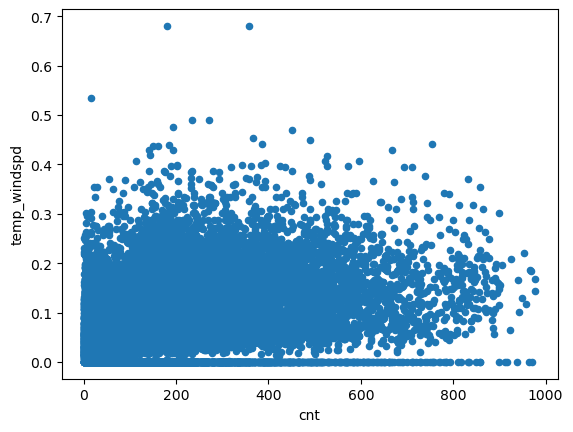

In [23]:
df.plot(kind="scatter", x="cnt", y='temp_windspd')

<Axes: xlabel='cnt', ylabel='casual_to_registered_ratio'>

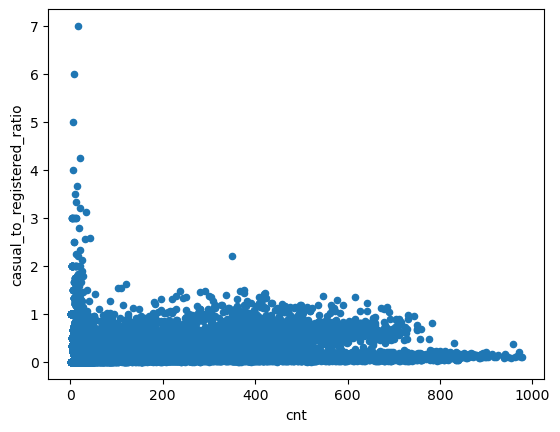

In [24]:
df.plot(kind="scatter", x="cnt", y='casual_to_registered_ratio')

## Prepare the Data for Machine Learning Algorithms

### Data Cleaning

**Dealing with missing features**

1. Get rid of the corresponding districts. dropna()
2. Get rid of the whole attribute. drop()
3. Set the values to some value (zero, the mean, the median, etc.) fillna()

In [25]:
df = df.drop("temp_windspd", axis=1)
df = df.drop("time_of_day", axis=1)
df = df.drop("casual_to_registered_ratio", axis=1)
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [26]:
sample_incomplete_rows = df[df.isnull().any(axis=1)].head()
sample_incomplete_rows   # display rows with missing values

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


There are no missing rows so we're done with data cleaning

## Handling Text and Categorical Attributes

Creating a new column which contains categorical data to explore one-hot encoding for this dataset.

In [27]:
# Define time of day labels
time_of_day_labels = ['Night', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Midnight']

# Define the corresponding time intervals (in hours)
time_intervals = [-1, 4, 8, 12, 16, 20, 24]

# Use the cut function to create the time of day feature
df['time_of_day'] = pd.cut(df['hr'], bins=time_intervals, labels=time_of_day_labels)

In [28]:
df_cat = df[["time_of_day"]]
df_cat.head(10)  # look at the value of  'ocean_proximity' for the first 10 instances

,time_of_day
0,Night
1,Night
2,Night
3,Night
4,Night
5,Early Morning
6,Early Morning
7,Early Morning
8,Early Morning
9,Morning


In [29]:
df_cat.tail(10)
# look at the value of  'ocean_proximity' for the last 10 instances

,time_of_day
17369,Afternoon
17370,Afternoon
17371,Afternoon
17372,Evening
17373,Evening
17374,Evening
17375,Evening
17376,Midnight
17377,Midnight
17378,Midnight


In [30]:
from sklearn.preprocessing import OrdinalEncoder
# sklearn OrdinalEncoder class is used to convert categorical values to numbers
ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(df_cat)
df_cat_encoded[:10] # Lists the numerical values that correspond to the categorical attribute
# Q15 Why can representing a catogorical variable with numbers be a problem in ML?


array([[5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [1.],
       [1.],
       [1.],
       [1.],
       [4.]])

In [31]:
# 1 D array of categories for the attribute 'ocean-proximity'
ordinal_encoder.categories_ # prints the categories for all categorical attributes , here we only have one categor

[array(['Afternoon', 'Early Morning', 'Evening', 'Midnight', 'Morning',
        'Night'], dtype=object)]

In [32]:
# An alternative way to represent a categorical attribuite is to use 'one-hot-encoding'

from sklearn.preprocessing import OneHotEncoder
# OneHotEncoder class converts categorical values into one-hot vectors , this assumes no order so better for categorical variables

cat_encoder = OneHotEncoder()
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_1hot

<17379x6 sparse matrix of type '<class 'numpy.float64'>'
	with 17379 stored elements in Compressed Sparse Row format>

In [33]:
type(df_cat_1hot) # This is a SciPy sparce matrix ( not a NumPy array)
# a sparse matrix only stores the location of the non‐zero enties , therefore saves memory

scipy.sparse._csr.csr_matrix

In [34]:
df_cat_1hot.toarray() # To convert it to a (dense) NumPy array, call toarrray() method


array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [35]:
cat_encoder = OneHotEncoder(sparse=False) # Alternatively, you can set sparse=False when creating the OneHotEncoder
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_1hot

/Users/sanjeevani1109/anaconda3/envs/F20DL/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [36]:
cat_encoder.categories_         # Get a list of categories

[array(['Afternoon', 'Early Morning', 'Evening', 'Midnight', 'Morning',
        'Night'], dtype=object)]

In [37]:
df = df.drop('time_of_day', axis = 1)